<a href="https://colab.research.google.com/github/PraveenAnanth5451/BootCamp/blob/main/Day8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Task 1**

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = tf.constant([5.0, 10.0, 30.0, 1.0])
y = tf.constant(20.0)
W1 = tf.Variable(1.0)
W2 = tf.Variable(0.0)
W3 = tf.Variable(-1.0)
W4 = tf.Variable(0.5)
W5 = tf.Variable(1.0)
W6 = tf.Variable(-1.0)
learning_rate = 0.01

with tf.GradientTape() as tape:
    H1 = W1 * x[0] + W2 * x[1]
    H2 = W3 * x[0] + W4 * x[3]
    y_hat = W5 * H1 + W6 * H2
    loss = (y - y_hat) ** 2
grads = tape.gradient(loss, [W1, W5])

W1.assign_sub(learning_rate * grads[0])
W5.assign_sub(learning_rate * grads[1])

print(f"Updated W1: {W1.numpy()}")


Updated W1: 2.049999952316284


### **Task 2**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


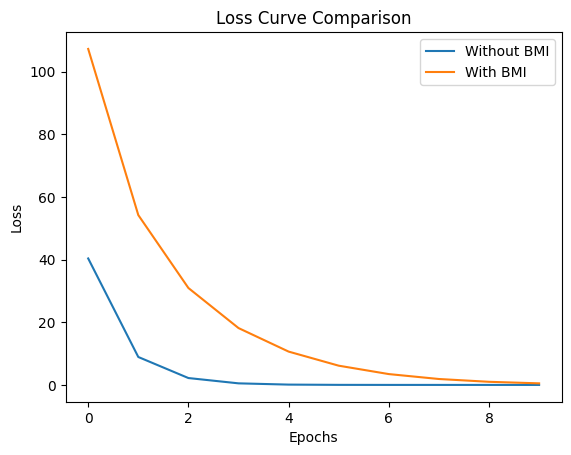

Loss curve shows limited performance without nonlinear BMI input.


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

height = np.array([5.0])
weight = np.array([10.0])
age = np.array([30.0])
smoking = np.array([1.0])
premium = np.array([20.0])


bmi = weight / (height ** 2)


X_no_bmi = np.array([[height[0], weight[0], age[0], smoking[0]]], dtype=np.float32)
X_with_bmi = np.array([[height[0], weight[0], age[0], smoking[0], bmi[0]]], dtype=np.float32)
Y = np.array([premium[0]], dtype=np.float32).reshape(-1, 1)
def create_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, activation=None, input_shape=(input_dim,)),
        tf.keras.layers.Dense(1, activation=None)
    ])
    return model


def train_model(model, X, Y, epochs=10):
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
    loss_fn = tf.keras.losses.MeanSquaredError()

    model.compile(optimizer=optimizer, loss=loss_fn)
    history = model.fit(X, Y, epochs=epochs, verbose=0, batch_size=1)
    return history.history['loss']


model_no_bmi = create_model(4)
loss_no_bmi = train_model(model_no_bmi, X_no_bmi, Y)

model_with_bmi = create_model(5)
loss_with_bmi = train_model(model_with_bmi, X_with_bmi, Y)
plt.plot(loss_no_bmi, label='Without BMI')
plt.plot(loss_with_bmi, label='With BMI')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve Comparison')
plt.legend()
plt.show()
print("Loss curve shows limited performance without nonlinear BMI input.")


### **Task 3**

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [7]:

(x_train, _), (_, _) = mnist.load_data()
x_sample = x_train[0]

x_sample = x_sample.astype(np.float32) / 255.0
x_sample = np.expand_dims(x_sample, axis=(0, -1))

custom_filter = np.array([[1, 0, 0],
                          [0, 1, 0],
                          [0, 0, 1]], dtype=np.float32)

custom_filter = custom_filter.reshape(3, 3, 1, 1)
custom_filter = tf.constant(custom_filter)

feature_map = tf.nn.conv2d(x_sample, custom_filter, strides=1, padding="VALID")
feature_map_np = feature_map.numpy().squeeze()



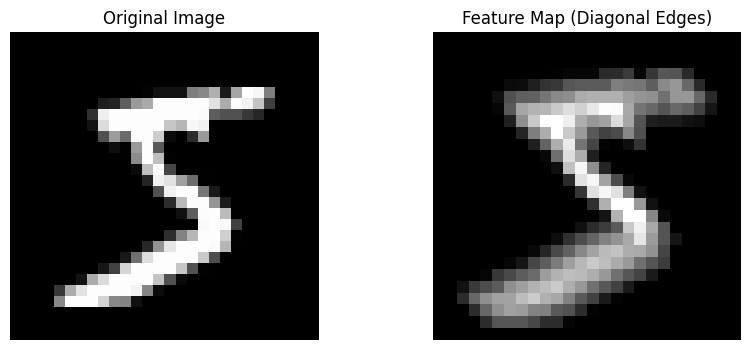

The filter detects diagonal edges by enhancing pixels along the top-left to bottom-right diagonal.


In [8]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(x_sample.squeeze(), cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(feature_map_np, cmap='gray')
plt.title("Feature Map (Diagonal Edges)")
plt.axis("off")

plt.show()

print("The filter detects diagonal edges by enhancing pixels along the top-left to bottom-right diagonal.")


### **Task 5**

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(3, (3,3), activation='relu', input_shape=(28,28,1), name="conv_layer"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

model = create_model()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

initial_weights = model.layers[0].get_weights()[0]

history = model.fit(x_train, y_train, epochs=20, batch_size=64, verbose=1, validation_data=(x_test, y_test))

final_weights = model.layers[0].get_weights()[0]

filter_index = 0


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9033 - loss: 0.3274 - val_accuracy: 0.9386 - val_loss: 0.2075
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9500 - loss: 0.1726 - val_accuracy: 0.9300 - val_loss: 0.3427
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9526 - loss: 0.1753 - val_accuracy: 0.9497 - val_loss: 0.2101
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9606 - loss: 0.1419 - val_accuracy: 0.9367 - val_loss: 0.3024
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9536 - loss: 0.1837 - val_accuracy: 0.9538 - val_loss: 0.2392
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9560 - loss: 0.1933 - val_accuracy: 0.9431 - val_loss: 0.2586
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9651 - loss: 0.1267 - val_accuracy: 0.9480 - val_loss: 0.2691
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.9655 - loss: 0.1342 - 

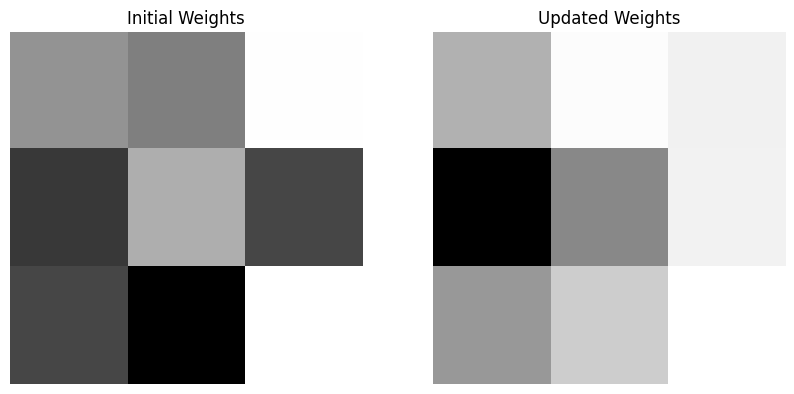

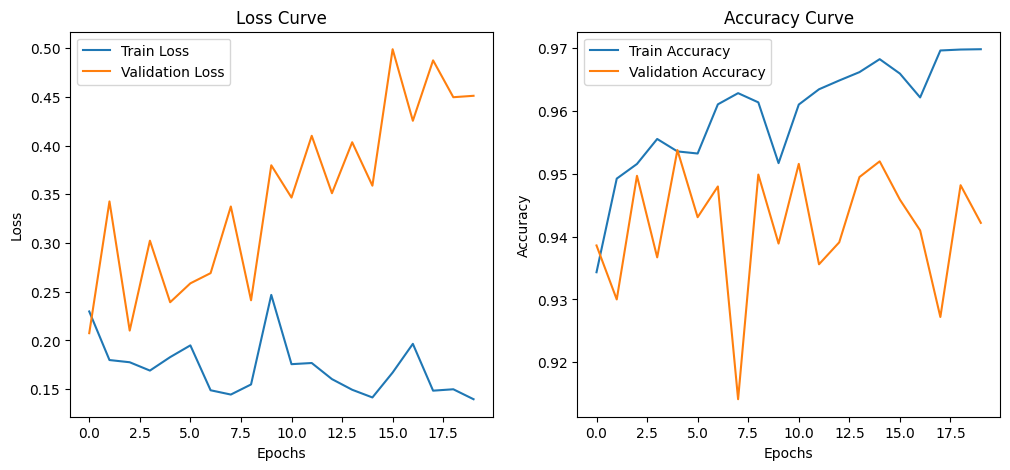

Final Test Accuracy: 0.9422


In [14]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(initial_weights[:, :, 0, filter_index], cmap='gray')
plt.title("Initial Weights")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(final_weights[:, :, 0, filter_index], cmap='gray')
plt.title("Updated Weights")
plt.axis("off")

plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Final Test Accuracy: {accuracy:.4f}')